Decision Tree

*   **Иерархическая структура:** Решения принимаются последовательно, шаг за шагом, на основе проверок признаков.
*   **Разделение пространства признаков:** Дерево решений делит пространство признаков на области, соответствующие разным прогнозам.  В нашем примере выше, дерево разделило клиентов на тех, кому выдать кредит, и тех, кому отказать, основываясь на значениях признаков.
*   **Простота интерпретации:** Легко понять, почему дерево приняло то или иное решение, просто проследив путь от корня до листа.
*   **Применимость для разных типов данных:** Деревья решений могут работать как с числовыми, так и с категориальными признаками.

Критерии разделения – это **метрики**, которые помогают оценить, насколько "хорошо" то или иное разделение данных по признаку.  "Хорошее" разделение – это такое, которое **уменьшает "неопределенность" или "неоднородность"** в данных после разделения.

**Для измерения этой "однородности" или "неопределенности" используются разные критерии, такие как:**

*   **Для классификации:**
    *   **Энтропия (Entropy):**  Мера беспорядка или хаоса в данных.  Чем выше энтропия, тем более "неоднородна" группа объектов по классам.  Чем ниже энтропия (ближе к 0), тем более "однородна" группа (все объекты принадлежат к одному классу).
    *   **Информационный прирост (Information Gain):**  Показывает, насколько уменьшается энтропия после разделения данных по определенному признаку.  Алгоритм стремится выбрать признак, который дает наибольший информационный прирост.
    *   **Критерий Джини (Gini Impurity):**  Еще одна мера "неоднородности", похожая на энтропию, но вычислительно немного проще.

*   **Для регрессии:**
    *   **Среднеквадратичная ошибка (MSE - Mean Squared Error):**  Используется для измерения разброса значений целевой переменной в узле.  Алгоритм стремится минимизировать MSE после разделения.
    *   **Среднее абсолютное отклонение (MAE - Mean Absolute Error):**  Еще один критерий для регрессии, также направленный на минимизацию ошибки.

**Энтропия** – это понятие из теории информации, которое характеризует степень неопределенности случайной величины. В нашем контексте, случайная величина – это класс объекта (например, "выдать кредит" или "отказать").

Формула для энтропии (для случая двух классов, например, 0 и 1):

$Entropy(S) = - p(0) * log_2(p(0)) - p(1) * log_2(p(1))$
где:

*   `S` – это набор данных (например, группа шариков или группа клиентов).
*   `p(0)` – доля объектов класса 0 в наборе `S`.
*   `p(1)` – доля объектов класса 1 в наборе `S`.
*   `log2` – логарифм по основанию 2.

Если все объекты в `S` принадлежат к одному классу то энтропия равна 0.  Неопределенности нет, все и так понятно.   
Если классы распределены поровну , то энтропия максимальна (для двух классов, равна 1).  Неопределенность максимальна, сложно предсказать класс.

**Информационный прирост (Information Gain)** для признака `A` и набора данных `S` рассчитывается как:

$$InformationGain(S, A) = Entropy(S) - [ взвешенная\ сумма\ энтропий\ для\ каждого\ подмножества, полученного\ после\ разделения\ S\ по\ признаку\ A ]$$

**Интуитивно:**

Информационный прирост показывает, насколько уменьшилась энтропия (то есть, насколько увеличилась "однородность") после того, как мы разделили данные по признаку `A`.  Алгоритм ID3 и C4.5 выбирают на каждом шаге тот признак, который дает **максимальный информационный прирост**.

**Ключевые моменты про построение деревьев решений:**

*   **Рекурсивный процесс "разделяй и властвуй".**
*   **Критерии разделения (энтропия, информационный прирост, Джини, MSE и т.д.) для выбора наилучшего признака на каждом шаге.**
*   **Цель – создание "однородных" групп в каждом листовом узле.**

**Переобучение деревьев решений (Overfitting in Decision Trees)** 🌳 🤕

Как мы уже говорили, деревья решений могут быть очень гибкими моделями. Они способны выстраивать сложные границы решений и идеально подстраиваться под обучающие данные.  Но в этом и кроется опасность.

**Переобученное дерево решений:**

*   **Идеально запоминает обучающие данные:**  Оно строит очень сложное дерево, которое точно классифицирует или предсказывает значения для всех объектов из обучающего набора.  Дерево может стать очень глубоким и ветвистым, подстраиваясь под каждую деталь обучающих данных, даже под шум и случайные выбросы.
*   **Плохо работает на новых, "невидимых" данных:**  Когда мы даем переобученному дереву новые данные, которые оно не видело во время обучения, его качество предсказаний резко падает.  Оно "запомнило" обучающие данные, но не выучило общие закономерности.

**Почему деревья решений склонны к переобучению?**

*   **Большая гибкость:** Деревья могут становиться очень сложными, особенно если мы не ограничиваем их глубину.  Сложное дерево может "выучить" даже случайные корреляции в обучающих данных, которые не являются истинными закономерностями.
*   **Жадный алгоритм построения:**  Алгоритм построения дерева на каждом шаге выбирает "лучшее" разделение локально, не заботясь о том, к чему это приведет глобально.  Это может привести к построению слишком развесистого и сложного дерева.

**Методы борьбы с переобучением деревьев решений (Controlling Overfitting)** 🛡️

Чтобы дерево решений хорошо работало не только на обучающих, но и на новых данных, нужно контролировать его сложность.  Вот основные методы:

1.  **Ограничение глубины дерева (Maximum Depth):** `max_depth`
    *   Самый простой и эффективный способ.  Мы задаем максимальную глубину дерева (количество уровней от корня до листьев).  Ограничивая глубину, мы не даем дереву становиться слишком развесистым и "запоминать" детали".
    *   Меньшая глубина $\rightarrow$ проще дерево $\rightarrow$ меньше переобучение, но возможен недообучение.
    *   Большая глубина $\rightarrow$ сложнее дерево $\rightarrow$ больше риск переобучения, но может лучше подстроиться под обучающие данные.
    *   Нужно подбирать оптимальную глубину, например, с помощью кросс-валидации.

2.  **Минимальное количество объектов в узле для разделения (Minimum Samples to Split):** `min_samples_split`
    *   Задает минимальное количество объектов, которое должно быть в узле, чтобы узел можно было разделить дальше.  Если в узле меньше объектов, чем `min_samples_split`, он становится листом и не делится.
    *   Увеличивая `min_samples_split`, мы делаем дерево менее склонным к разделению на "мелкие" группы, которые могут быть шумом.

3.  **Минимальное количество объектов в листовом узле (Minimum Samples per Leaf):** `min_samples_leaf`
    *   Задает минимальное количество объектов, которое должно быть в каждом листовом узле.  Если после разделения в каком-то дочернем узле окажется меньше объектов, чем `min_samples_leaf`, разделение отменяется.
    *   Похоже на `min_samples_split`, но контролирует размер именно листовых узлов.  Делает листья более "надежными" и предотвращает создание листьев, основанных на очень малом количестве данных.

4.  **Максимальное количество листовых узлов (Maximum Leaf Nodes):** `max_leaf_nodes` (менее распространенный параметр)
    *   Ограничивает общее количество листовых узлов в дереве.  Более прямо контролирует сложность дерева, чем ограничение глубины.

5.  **Пpюнинг (Pruning - "отсечение веток"):**
    *   После того, как дерево построено до некоторой глубины (возможно, даже переобученное), мы можем "отсекать" некоторые ветви, которые не приносят значительного улучшения качества на **валидационной выборке**.  Это более сложный процесс, чем просто ограничение глубины, но может быть более эффективным.

**Bias-Variance Tradeoff в Деревьях Решений 

В контексте **деревьев решений**:

1.  **Bias (Смещение, систематическая ошибка):**
    *   **Простые деревья (маленькой глубины, с ограничениями):**  Имеют **высокий Bias**.
    *   **Почему?**  Простые деревья делают очень общие, "грубые" предположения о данных. Они не способны уловить сложные закономерности и зависимости.  Они **недообучаются** (underfit) под обучающие данные.
    *   **Аналогия:**  Представь, что ты пытаешься аппроксимировать кривую сложной формы прямой линией. Прямая линия (простое дерево) будет иметь высокое смещение — она систематически отклоняется от истинной кривой.
    *   **Последствия:**  Плохая точность как на обучающей, так и на тестовой выборках. Модель просто недостаточно сложна, чтобы выучить закономерности.

2.  **Variance (Дисперсия, случайная ошибка):**
    *   **Сложные деревья (большой глубины, без ограничений):** Имеют **высокий Variance**.
    *   **Почему?**  Сложные деревья очень гибкие и могут "запомнить" даже шум и случайные колебания в обучающих данных. Они подстраиваются под каждую деталь обучающего набора, но теряют способность обобщать на новые данные. Они **переобучаются** (overfit) под обучающие данные.
    *   **Аналогия:**  Представь, что ты пытаешься провести очень извилистую кривую точно через все точки обучающих данных, включая случайные выбросы. Эта кривая (сложное дерево) будет иметь высокую дисперсию — она будет сильно меняться, если ты немного изменишь обучающие данные.
    *   **Последствия:**  Отличная точность на обучающей выборке (может быть даже 100%), но плохая или значительно хуже точность на тестовой выборке. Модель слишком "запомнила" обучающие данные, включая шум.

**Tradeoff (Компромисс):**

*   Мы хотим найти **баланс** между Bias и Variance.
*   **Уменьшая Bias** (усложняя дерево, увеличивая глубину), мы обычно **увеличиваем Variance**.
*   **Уменьшая Variance** (упрощая дерево, ограничивая глубину, применяя регуляризацию), мы обычно **увеличиваем Bias**.

**Регуляризация в деревьях решений (например, `max_depth`, `min_samples_split`, `min_samples_leaf`)** предназначена для **уменьшения Variance**.  Ограничивая сложность дерева, мы делаем его менее чувствительным к шуму в обучающих данных, что улучшает его способность к обобщению.  Но при этом нужно не переусердствовать, чтобы не сделать дерево слишком простым и не увеличить Bias.

**Визуализация:**

Представь себе мишень для стрельбы.

*   **Высокий Bias, низкий Variance:**  Все выстрелы кучно собраны в одном месте, но далеко от центра мишени (цели). Модель систематически ошибается (высокое смещение), но ошибки стабильны (низкая дисперсия).
*   **Низкий Bias, высокий Variance:** Выстрелы разбросаны по всей мишени, в среднем они попадают в центр, но каждый отдельный выстрел может быть далеко от центра. Модель в среднем точна (низкое смещение), но прогнозы очень нестабильны (высокая дисперсия).
*   **Низкий Bias, низкий Variance (идеал):**  Все выстрелы кучно собраны в центре мишени. Модель и точна, и стабильна.

---

Практика

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
display(iris_df.head())
print(f'\nНазвания классов: {class_names}')
print(f'Названия признаков: {feature_names}')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Названия классов: ['setosa' 'versicolor' 'virginica']
Названия признаков: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')

Размер обучающей выборки: (105, 4)
Размер тестовой выборки: (45, 4)


In [8]:
tree_clf_unlim = DecisionTreeClassifier(random_state=42)
tree_clf_unlim.fit(X_train, y_train)

y_train_pred_unlim = tree_clf_unlim.predict(X_train)
train_accuracy_unlimited = accuracy_score(y_train, y_train_pred_unlim)

y_test_pred_unlim = tree_clf_unlim.predict(X_test)
test_accuracy_unlimited = accuracy_score(y_test, y_test_pred_unlim)

print(f'Точность на обучающей выборке (без ограничений): {train_accuracy_unlimited:.4f}')
print(f'Точность на тестовой выборке (без ограничений): {test_accuracy_unlimited:.4f}')

Точность на обучающей выборке (без ограничений): 1.0000
Точность на тестовой выборке (без ограничений): 1.0000


In [9]:
max_depths = [2, 3, 4, 5, 6, 7, 8, None] # Разные значения max_depth для экспериментов
train_accuracies_depth = []
test_accuracies_depth = []

for depth in max_depths:
    tree_clf_depth_limited = DecisionTreeClassifier(max_depth=depth, random_state=42) # Задаем max_depth
    tree_clf_depth_limited.fit(X_train, y_train)

    y_train_pred_depth = tree_clf_depth_limited.predict(X_train)
    train_accuracy_depth = accuracy_score(y_train, y_train_pred_depth)
    train_accuracies_depth.append(train_accuracy_depth)

    y_test_pred_depth = tree_clf_depth_limited.predict(X_test)
    test_accuracy_depth = accuracy_score(y_test, y_test_pred_depth)
    test_accuracies_depth.append(test_accuracy_depth)

    print(f'Max depth: {depth}, Train Accuracy: {train_accuracy_depth:.4f}, Test Accuracy: {test_accuracy_depth:.4f}')

Max depth: 2, Train Accuracy: 0.9429, Test Accuracy: 0.9778
Max depth: 3, Train Accuracy: 0.9524, Test Accuracy: 1.0000
Max depth: 4, Train Accuracy: 0.9714, Test Accuracy: 1.0000
Max depth: 5, Train Accuracy: 0.9905, Test Accuracy: 1.0000
Max depth: 6, Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max depth: 7, Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max depth: 8, Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max depth: None, Train Accuracy: 1.0000, Test Accuracy: 1.0000


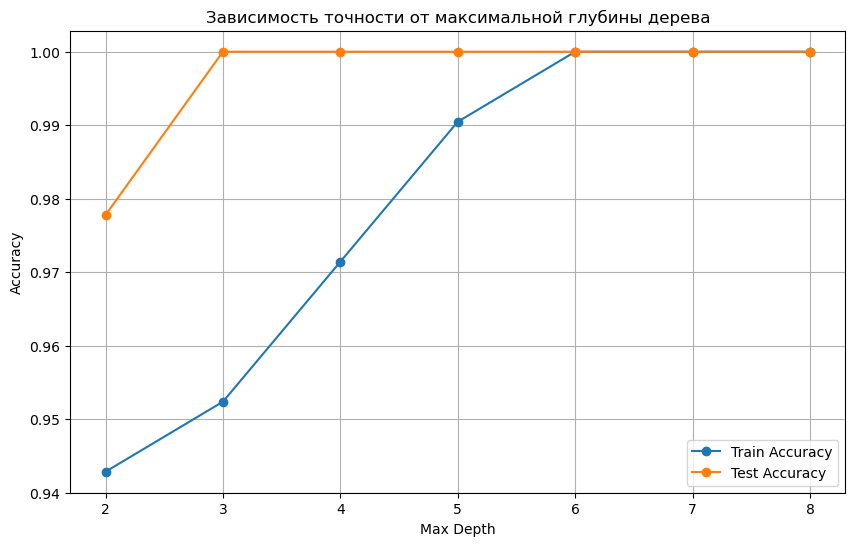

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(max_depths[:-1], train_accuracies_depth[:-1], marker='o', label='Train Accuracy') # Исключаем None для оси X
plt.plot(max_depths[:-1], test_accuracies_depth[:-1], marker='o', label='Test Accuracy')   # Исключаем None для оси X
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Зависимость точности от максимальной глубины дерева')
plt.legend()
plt.grid(True)
plt.xticks(max_depths[:-1]) # Метки по значениям max_depth
plt.show()